# Intercorrélation

<hr />

**Notes**
* Si le haut parleur n'est pas branché ou que le son est coupé : faire un bruit à la bouche.
* Réglages sur le portable :
  * Sortie : Speakers - Audio interne
  * Entrée : Microphone - Audio interne (vol 60 %)

<hr />

En plaçant les deux microphones à une distance différente du haut-parleur,
le son produit par celui-ci sera capté à des instants différents par les deux microphones.
En mesurant le délai $t$ entre ces deux instants,
et connaissant la distance $d$ entre les deux microphones,
nous pourrons déduire la vitesse du son $v$ :

$$v = \frac{d}{t}$$

Pour mesurer le délai $t$, on peut utiliser l'intercorrélation qui permet d'avoir le décalage nécessaire pour que les deux sons captés soient similaires.

Pour que la méthode fonctionne bien, il faut que l'intercorrélation soit la plus piquée possible.
Cela implique que le son joué par le haut-parleur ne se répète pas :
on peut donc utiliser un « clap » ou un bruit.

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import sound

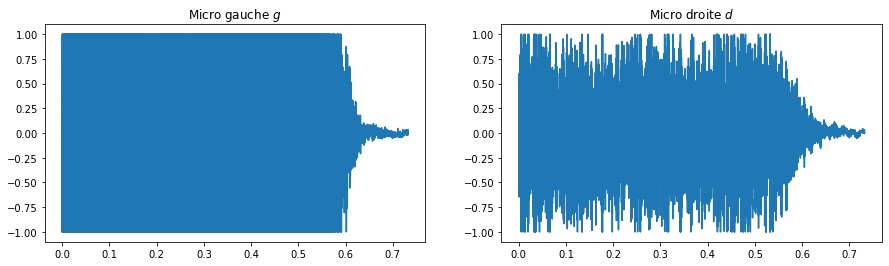

<Figure size 432x288 with 0 Axes>

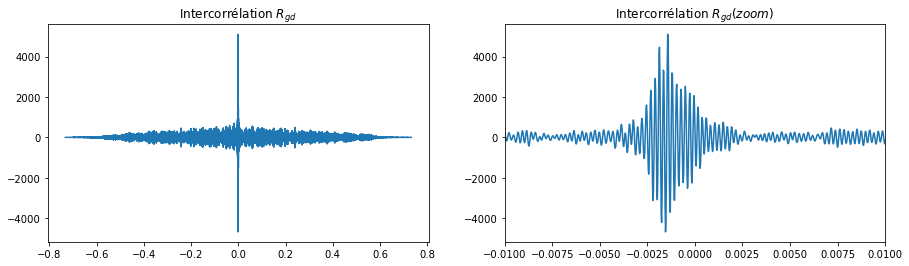

imax : 32236
Delta t : 0.0014285714285714286
Vitesse : 350.0 m/s


In [5]:
# Règle le volume avant acquisition
# sound.init_volume()

# Acquisition
fe = 44100             # Fréquence d'échantillonage
left, right, samples = sound.play_and_record("whitenoise", 2)

# Suppression des premiers échantillons (vraiment utile ?)
left = left[100000:]
right = right[100000:]

# Corrélation
corr = scipy.signal.correlate(left, right, mode="full")

# Vecteurs temps
N = len(left)              # Nombre d'échantillons 
t = np.arange(0,N)/fe      # Vecteur temps des signaux enregistrés
tx = np.arange(-N+1,N)/fe  # Vecteur temps de la corrélation

# Affichage des signaux enregistrés
fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].plot(t, left)
axs[0].set_title("Micro gauche $g$")
axs[1].plot(t, right)
axs[1].set_title("Micro droite $d$")
plt.show()

# Affichage de la corrélation
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].plot(tx, corr)
axs[0].set_title("Intercorrélation $R_{gd}$")
axs[1].plot(tx, corr)
axs[1].set_title("Intercorrélation $R_{gd} (zoom)$")
axs[1].set_xlim([-.01, .01])
plt.show()

# Mesure de la vitesse du son
imax = np.argmax(corr)
t = np.abs(tx[imax])
d = 0.5
print("imax : "+str(imax))
print("Delta t : "+str(t))
print("Vitesse : "+str(d/t)+" m/s")